In [394]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import openpyxl 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas_profiling

In [395]:
def reverse(txt):
    return txt[::-1]

In [396]:
data=pd.read_excel('data_after_cleaned.xlsx',engine='openpyxl')
df=data.copy()

In [397]:
len(data)


22782

In [23]:
'אמבולנס - ביטול'

0    [אמבולנס, -, הוזמן]
1     [אמבולנס, -, הגיע]
2     [אמבולנס, -, בקשה]
3     [אמבולנס, -, בקשה]
4     [אמבולנס, -, הגיע]
5    [אמבולנס, -, הוזמן]
6     [אמבולנס, -, הגיע]
7     [אמבולנס, -, הגיע]
8    [אמבולנס, -, הוזמן]
Name: split_action, dtype: object

In [398]:
action_to_drop=['בירור- אמבולנס','איחוד הצלה - עודכנו','אמבולנס - ביטול']
data=data.loc[~data['action_desc'].isin(action_to_drop)]

In [399]:
data[data['act_category']=='שירותי אמבולנס']['action_desc'].value_counts()

אמבולנס - הגיע     570
אמבולנס - הוזמן    394
אמבולנס - בקשה     338
Name: action_desc, dtype: int64

In [400]:
x=data.drop(['action_desc',
             'counts',
             'quantile_10_count',
             'out_std',
             'q_out',
             't_call_int',
             'count_until_t_Call'],axis=1)

In [401]:
len(x)
# df['nb_months'] = ((df.date2 - df.date1)/np.timedelta64(1, 'M'))

22408

In [402]:
# d = {'id':[],'time':[],'event':[], 'start': [],'end': [],'interval': []}
# empty = pd.DataFrame(data=d)
# empty

In [403]:
y=x.drop_duplicates()
print(len(y))

12664


In [425]:
df=y.copy()

In [426]:
df_ambu=df[df['act_category']=='שירותי אמבולנס']

In [427]:
id_list=list(df['id'].unique())
#id_list

In [428]:
start_of_ofek=data['t_call'].min().date()
start_of_ofek
end_of_ofek=data['t_call'].max().date()
(end_of_ofek-end_of_ofek).days


0

In [429]:
df.loc[df['id']==240040,'lon_code']=df.loc[df['id']==240040]['lon_code'].mode()[0]
df.loc[df['id']==241234,'lon_code']=df.loc[df['id']==241234]['lon_code'].mode()[0]
df.loc[df['id']==1490,'gender_code']=df.loc[df['id']==1490]['gender_code'].mode()[0]
df.loc[df['id']==5119,'gender_code']=df.loc[df['id']==5119]['gender_code'].mode()[0]
df.loc[df['id']==231238,'gender_code']=df.loc[df['id']==231238]['gender_code'].mode()[0]
df.loc[df['id']==241845,'gender_code']=df.loc[df['id']==241845]['gender_code'].mode()[0]
df.loc[df['id']==242788,'gender_code']=df.loc[df['id']==242788]['gender_code'].mode()[0]
#df.loc[df['id']==240040]['gender_code'].mode()

In [430]:
df.loc[df['id']==231238]['gender_code'].mode()[0]

5

In [431]:
start_of_ofek=data['t_call'].min().date()
end_of_ofek=data['t_call'].max().date()
d = {'id':[],'time':[],'event':[], 'start': [],'end': [],'interval': []}
df_amb = pd.DataFrame(data=d)
#df_amb = pd.DataFrame()
def create_data_in_servival_mode(id_list,df,df_amb,start=start_of_ofek,end=end_of_ofek):
    for idd in id_list:
        d = {'id':[],'time':[],'event':[], 'start': [],'end': [],'interval': []}
        if len(df.loc[df['id']==idd])==0:
            d['id'].append(idd)
            d['time'].append((end-start).days)
            d['event'].append(0)
            d['start'].append((start-start).days)
            d['end'].append((end-start).days)
            d['interval'].append(1)
            d_df=pd.DataFrame.from_dict(d)
            df_amb=pd.concat([df_amb, d_df], axis =0)
        if len(df.loc[df['id']==idd])>0:
            data_id=df.loc[df['id']==idd].sort_values(by='t_call')
            interval=1
            start_d=start
            for index, row in data_id.iterrows():
                d['id'].append(idd)
                d['event'].append(1)
                d['start'].append((start_d-start).days)
                d['end'].append((row['t_call'].date()-start).days)
                d['time'].append((row['t_call'].date()-start).days)
                d['interval'].append(interval)       
                interval=interval+1
                start_d=row['t_call'].date()
                if row['id']==9860:
                    continue
                if len(d['id'])==len(data_id):
                    d['id'].append(idd)
                    d['event'].append(0)
                    d['start'].append((start_d-start_of_ofek).days)
                    d['end'].append((end-start).days)
                    d['time'].append((end-start).days)
                    d['interval'].append(interval)
                    continue         
            d_df=pd.DataFrame.from_dict(d)
            df_amb=pd.concat([df_amb, d_df], axis =0)
    return df_amb

    

In [432]:
#id_list=[1436]
id_list=list(df['id'].unique())
#id_list
datax=create_data_in_servival_mode(id_list,df_ambu,df_amb,start=start_of_ofek,end=end_of_ofek)
datax=datax.astype(int).sort_values(by='id').reset_index(drop=True)
#survival_data=datax.astype(int).sort_values(by=['id','interval'])
#survival_data

In [355]:
datax

,id,time,event,start,end,interval
0,1283,2191,0,674,2191,2
1,1283,674,1,0,674,1
2,1308,1978,1,1969,1978,2
3,1308,2191,0,1978,2191,3
4,1308,1969,1,0,1969,1
...,...,...,...,...,...,...
1351,310359,2191,0,0,2191,1
1352,310552,1614,1,0,1614,1
1353,310552,1621,1,1614,1621,2
1354,310552,2191,0,1621,2191,3


In [433]:
df['residence_type_code']=0
df.loc[df['residence_type']=='קהילה','residence_type_code']=0
df.loc[df['residence_type']=='דיור מוגן','residence_type_code']=1

In [434]:
df_2_merge=df[['id','residence_type_code','gender_code','lon_code']].drop_duplicates()
survival_data=datax.merge(df_2_merge,on='id',how='left')
print(len(survival_data))

1356


In [415]:
survival_data[survival_data['id']==231238]

,id,time,event,start,end,interval,residence_type_code,gender_code,lon_code
709,231238,1969,1,1929,1969,7,0,NaN,1.0
710,231238,141,1,0,141,1,0,NaN,1.0
711,231238,2191,0,1969,2191,8,0,NaN,1.0
712,231238,1929,1,1806,1929,6,0,NaN,1.0
713,231238,1085,1,732,1085,3,0,NaN,1.0
714,231238,732,1,141,732,2,0,NaN,1.0
715,231238,1806,1,1209,1806,5,0,NaN,1.0
716,231238,1209,1,1085,1209,4,0,NaN,1.0


In [435]:
survival_data.to_csv('survival_data.csv',index=False)

In [385]:
columns={'תאריך_קריאה':'t_call',
         'סוג ארוע':'sug_erua',
         'קהילה / דיור מוגן':'residence_type',
         'שנה':'year',
         'שעה -1':'hour',
         'חודש':'month',
         'מגדר':'gender_name',
         'מגדר 4ז ,5נ , 6זוג':'gender_code',
         'קוד לקוח':'id',
         'יום':'day',
         'סוג יום':'day_type',
         'תאור_פעולה':'action_desc',
         'עם מי גר':'lon_desc',
         'רמת בדידות 1גר לבד , 2בן זוג , 3 בן משפחה':'lon_code',
         'סוג קטגוריה':'type_category',
         'קטגוריות פעולה':'act_category',
         'עונה':'season'
}

In [386]:
x=data.drop_duplicates()
print('num of duplicates rows',len(data)-len(x))

num of duplicates rows 16699


In [387]:
data=data.drop_duplicates()
data = data.drop(['כפילות','תאריך_התחלה','תאריך_סיום','ארגון','שעה','תאריך_קריאה.1','חודש.1','תאריך_קריאה.2'], axis=1)
data

,קהילה / דיור מוגן,סוג ארוע,תאריך_קריאה,חודש,שעה -1,שנה,סוג יום,יום,קוד לקוח,"מגדר 4ז ,5נ , 6זוג",מגדר,"רמת בדידות 1גר לבד , 2בן זוג , 3 בן משפחה",עם מי גר,תאור_פעולה,קטגוריות פעולה,סוג קטגוריה,עונה
0,קהילה,חשמל ECI,2012-01-01 00:26:00.157,1,0,2012,יום חול,ראשון,237588,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
1,קהילה,בדיקת תקינות,2012-01-01 04:05:12.583,1,4,2012,יום חול,ראשון,241233,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
2,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - הוזמן,שירותי רופא,שירותי בריאות,חורף
4,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - הגיע,שירותי רופא,שירותי בריאות,חורף
7,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - בקשה,שירותי רופא,שירותי בריאות,חורף
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129551,קהילה,סוללה חלשה ECI,2017-12-31 19:30:11.897,12,19,2017,יום חול,ראשון,239310,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129552,קהילה,סוללה חלשה ECI,2017-12-31 19:30:21.680,12,19,2017,יום חול,ראשון,227294,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129553,דיור מוגן,סוללה חלשה ECI,2017-12-31 19:33:40.270,12,19,2017,יום חול,ראשון,5626,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129554,דיור מוגן,סוללה חלשה ECI,2017-12-31 22:02:29.747,12,22,2017,יום חול,ראשון,2238,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף


In [388]:
data = data.rename(columns =columns, inplace = False)
data

,residence_type,sug_erua,t_call,month,hour,year,day_type,day,id,gender_code,gender_name,lon_code,lon_desc,action_desc,act_category,type_category,season
0,קהילה,חשמל ECI,2012-01-01 00:26:00.157,1,0,2012,יום חול,ראשון,237588,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
1,קהילה,בדיקת תקינות,2012-01-01 04:05:12.583,1,4,2012,יום חול,ראשון,241233,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
2,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - הוזמן,שירותי רופא,שירותי בריאות,חורף
4,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - הגיע,שירותי רופא,שירותי בריאות,חורף
7,קהילה,ECI לחצן,2012-01-01 08:14:03.653,1,8,2012,יום חול,ראשון,241436,6.0,זוג,2,בן זוג,רופא - בקשה,שירותי רופא,שירותי בריאות,חורף
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129551,קהילה,סוללה חלשה ECI,2017-12-31 19:30:11.897,12,19,2017,יום חול,ראשון,239310,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129552,קהילה,סוללה חלשה ECI,2017-12-31 19:30:21.680,12,19,2017,יום חול,ראשון,227294,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129553,דיור מוגן,סוללה חלשה ECI,2017-12-31 19:33:40.270,12,19,2017,יום חול,ראשון,5626,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף
129554,דיור מוגן,סוללה חלשה ECI,2017-12-31 22:02:29.747,12,22,2017,יום חול,ראשון,2238,5.0,נקבה,1,גר לבד,NaN,חסר תיאור,חסר תיאור,חורף


In [389]:
#remove outlayer
data=data[data['residence_type']!=0]





In [390]:
# l=data['sug_erua'].unique().tolist()
# for e in l:
#     print(e)
#     print(data[data['sug_erua']==e]['action_desc'].value_counts(normalize=True))


In [391]:
data['sug_erua'].unique().tolist()

['חשמל ECI',
 'בדיקת תקינות',
 'ECI לחצן',
 'סוללה חלשה ECI',
 'ECI מכשיר',
 'שיחה טלפונית',
 'אירוע ידני',
 'קריאה שמירת קשר',
 'נייד קרני']

In [392]:
# kind of events to drop 
sug_erua_to_drop=['חשמל ECI',
 'בדיקת תקינות',
 'סוללה חלשה ECI',
 'נייד קרני' ,
'קריאה שמירת קשר'                      
]


In [393]:
df=data[~data['sug_erua'].isin(sug_erua_to_drop)]
len(df)

33779

In [394]:
df=df.drop_duplicates()
len(df)/len(data)

0.2829889416601687

In [395]:
df['sug_erua'].unique().tolist()

['ECI לחצן', 'ECI מכשיר', 'שיחה טלפונית', 'אירוע ידני']

In [396]:
df['id'].nunique()

818

In [398]:
act_category_to_drop=['ניסוי','איתחול']
act_desc_to_drop=['New After Deleted']
df=df[~df['action_desc'].isin(act_desc_to_drop)]
df=df[~df['act_category'].isin(act_category_to_drop)]
# data['action_desc'].value_counts()

In [399]:
df['sug_erua'].value_counts()

ECI לחצן        13505
ECI מכשיר        7892
שיחה טלפונית     2716
אירוע ידני       1641
Name: sug_erua, dtype: int64

In [400]:
#complete known missing values
df.loc[df['id'].isin([241329,239506]),'gender_name']='זכר'
df.loc[df['id'].isin([234306]),'gender_name']='נקבה'
#df[df['סוג ארוע']=='ECI מכשיר'][['מגדר','קהילה / דיור מוגן']].value_counts(normalize=True)
df.loc[df['id'].isin([7579,11874]),'gender_name']='נקבה'
df.loc[df['gender_name']=='זכר','gender_code']=4
df.loc[df['gender_name']=='נקבה','gender_code']=5
df.loc[df['gender_name']=='זוג','gender_code']=6
df=df[~df['gender_name'].isna()]
df=df[~df['action_desc'].isna()]
#236202,7579,11874
#df[df['מגדר'].isna()][['קוד לקוח','שנה']].value_counts(normalize=False)#.plot(kind='bar')

In [401]:
len(df)

25102

In [ ]:
דג

In [402]:
# df.loc[df['action_desc'].isna(),'action_desc']='תשומת לב עבור ריקים'
#df[df['action_desc'].isna()][['עם מי גר']].value_counts(normalize=True)#.plot(kind='bar')

In [403]:
#create bins  of numbers of records
df['counts'] = df['id'].map(df['id'].value_counts(normalize=False))
bin_labels_10 = ['1', '2', '3', '4', '5','6','7','8','9','10']
df['quantile_10_count'] = pd.qcut(df['counts'],
                              q=[0,.1,.2,.3,.4,.5, .6,.7, .8,.9, 1],
                              labels=bin_labels_10)

In [404]:
#outlier detection-std version
def out_std(s, nstd=4.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s] 
    
# #outlier detection-percentile version    
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

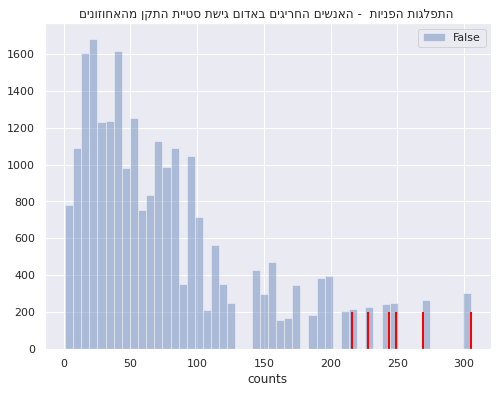

In [430]:
outlyer_id=[241113 ,240506,241113, 224766 ,239248, 240506, 241227 ,238531]
#outlier_mask = out_std(df['counts'], nstd=3.0)
outlier_mask=out_iqr(df['counts'],k=1.5)
plt.figure(figsize=(8,6))
sns.distplot(df['counts'], kde=False);
plt.legend(outlier_mask,loc="upper right")
plt.title(reverse(" התפלגות הפניות  - האנשים החריגים באדום גישת סטיית התקן מהאחוזונים"))
plt.vlines(df['counts'][outlier_mask], ymin=0, ymax=200, linestyles='solid',color='red');

In [428]:

df['out_std']=out_std(df['counts'], nstd=3, return_thresholds=False)
std_out=df[df['out_std']==True]['id'].unique()
df=df[~df['out_std']==True]

In [431]:
#outlier removal

#df['out_std']=out_std(df['counts'], nstd=3, return_thresholds=False)
#std_out=df[df['out_std']==True]['id'].unique()
#df=df[~df['out_std']==True]
df['q_out']=out_iqr(df['counts'],k=1.5,return_thresholds=False)
df=df[~df['q_out']==True]


In [9]:
len(df)

22814

In [13]:
def df_rev_col(df,col_list):
    x=df[col_list].copy()
    for col in col_list:
        x[col]=x[col].apply(lambda x: x[::-1])
    return x



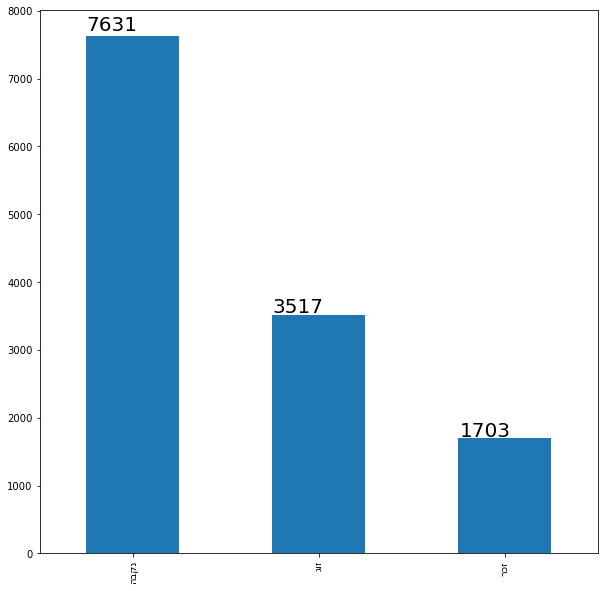

In [14]:
fig,ax=plt.subplots(1,1)
plt.rcParams.update({'font.size':20})
df['gender_name'].apply(lambda x: reverse(x)).value_counts(normalize=False,dropna=False).plot(kind='bar',ax=ax,figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.010),size=20)
plt.show()


In [15]:
def plots(df,col1,col2):
    fig,ax=plt.subplots(1,2)
    plt.rcParams.update({'font.size':12})
    dfo=df_rev_col(df,[col1,col2])
    dfo.groupby([col1,col2]).size().unstack(level=1).plot(kind='bar',stacked=False,ax=ax[0],figsize=(20,10))
    gk=dfo.groupby([col1,col2]).size().unstack()
    gk['sum']=gk.sum(axis=1)
    gk=round(gk.div(gk['sum'],axis=0),2)
    gk=gk.drop(['sum'],axis=1)
    for p in ax[0].patches:
        ax[0].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    ax[0].legend(prop={'size':12},loc=1)
    ax[0].title.set_text(reverse(f'התפלגות לפי כמויות'))
    ax[1].title.set_text(reverse(f'התפלגות  לפי  אחוזים'))
    gk.plot(kind='bar',ax=ax[1],legend=None)
    for p in ax[1].patches:
        ax[1].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    plt.show()



In [16]:
df.dtypes
#df['gender_code']=df['gender_code'].astype('int64')


residence_type            object
sug_erua                  object
t_call            datetime64[ns]
month                      int64
hour                       int64
year                       int64
day_type                  object
day                       object
id                         int64
gender_code                int64
gender_name               object
lon_code                   int64
lon_desc                  object
act_category              object
type_category             object
season                    object
dtype: object

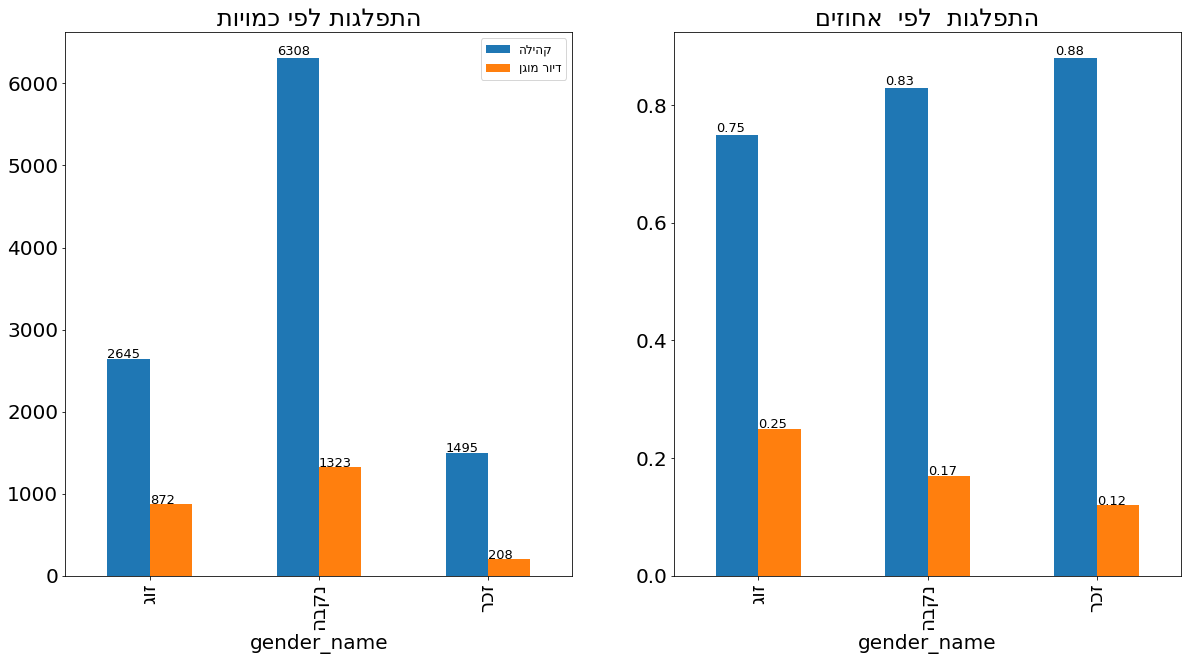

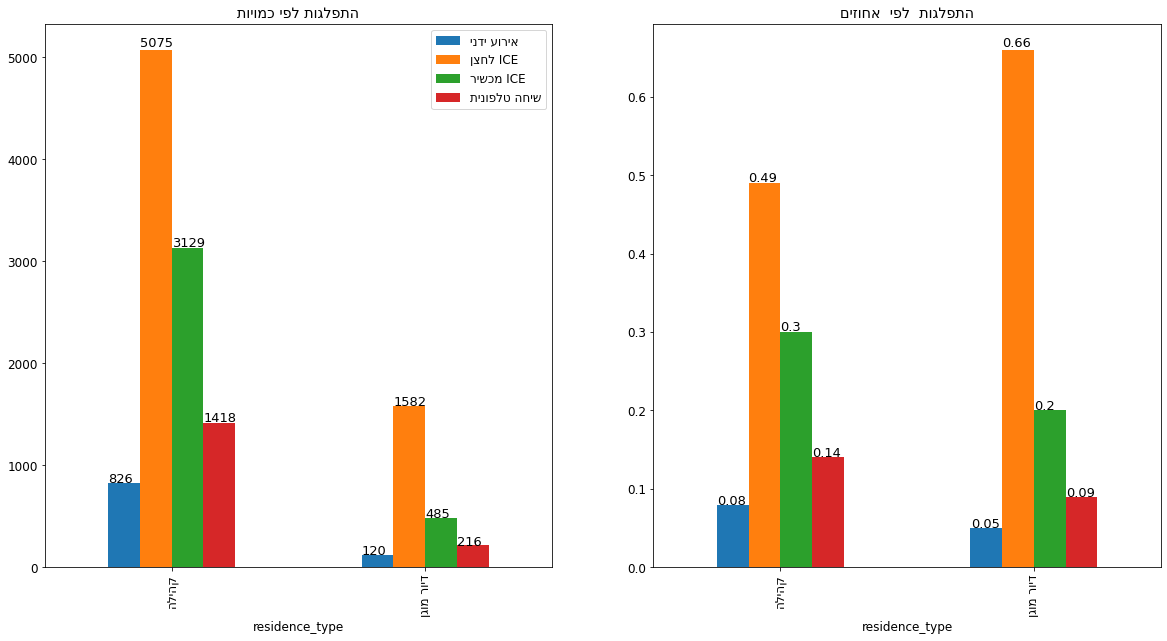

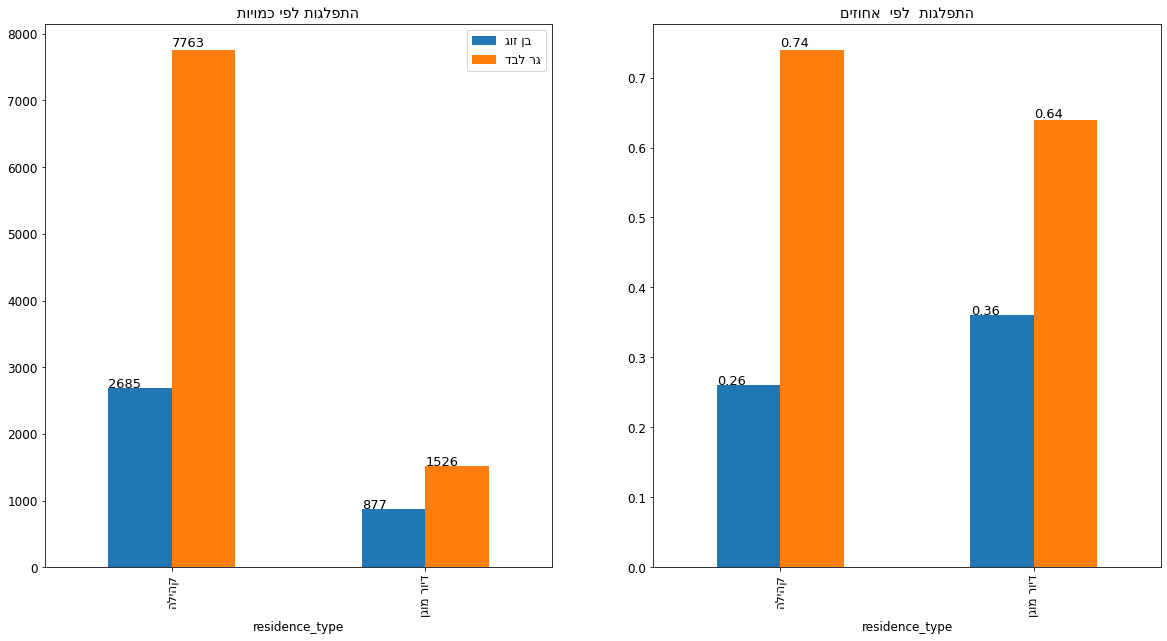

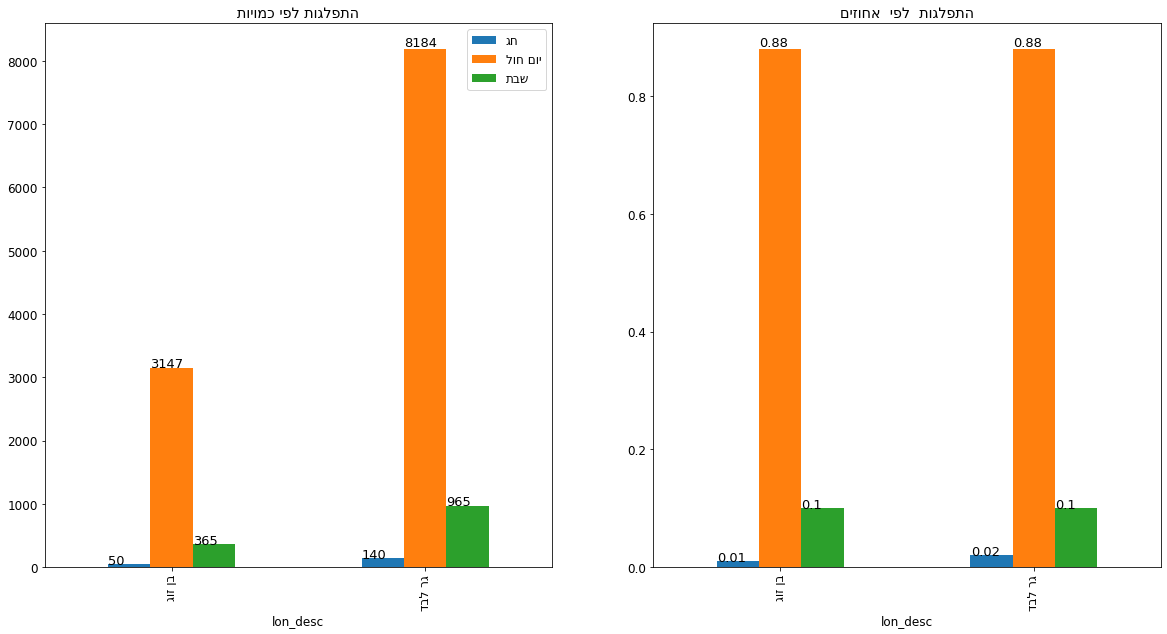

In [17]:
plots(df,'gender_name','residence_type')
plots(df,'residence_type','sug_erua')
plots(df,'residence_type','lon_desc')
plots(df,'lon_desc','day_type')

In [74]:
# for i in df.columns:
#     if df[i].nunique()>30:
#         continue
#     print(f'option for {i}',df[i].value_counts(normalize=True).to_frame())
#     print("---------------#---------------")


In [75]:
# for i in data.columns:
#     if data[i].nunique()>30:
#         continue
#     print(f'option for {i}',data[i].unique())


In [437]:
df[df['type_category']=='חסר תיאור']['act_category'].value_counts(normalize=True)

Series([], Name: act_category, dtype: float64)

In [438]:
def plot_values_counts(df,col1):
    fig,ax=plt.subplots(1,1,figsize=(5, 5))

    if df[col1].dtype=='int64':
        round(df[col1].value_counts(normalize=True),3).plot(kind='bar',ax=ax)
        plt.show()
        return
    round(df[col1].apply(lambda x : reverse(x)).value_counts(normalize=True),3).plot(kind='barh',ax=ax)
    #for p in ax.patches:
             #ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.001),size=15)
    ax.title.set_text(f'{col1} distribution')
             #ax.tick_params(axis='x', labelsize=15)
    plt.show()

In [439]:
columns_to_view=['residence_type', 'sug_erua', 'year',
       'day_type', 'day', 'gender_name',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season']

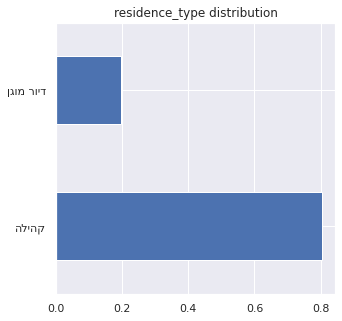

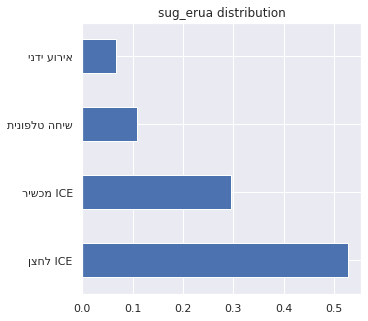

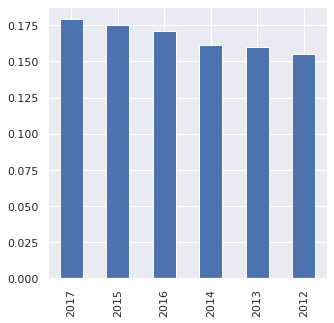

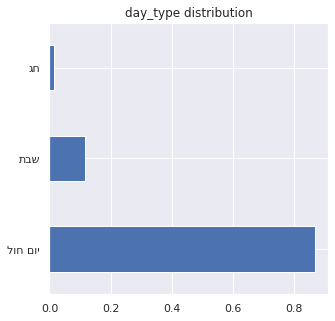

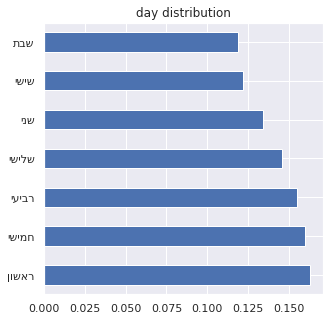

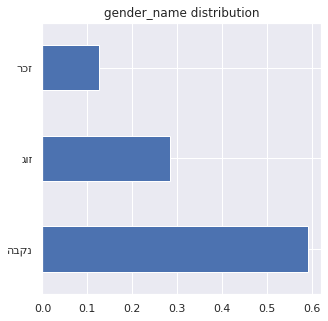

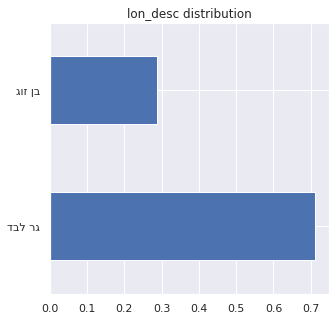

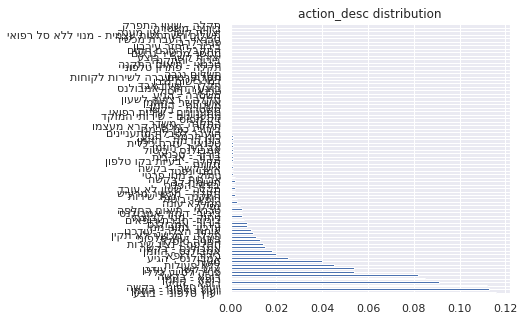

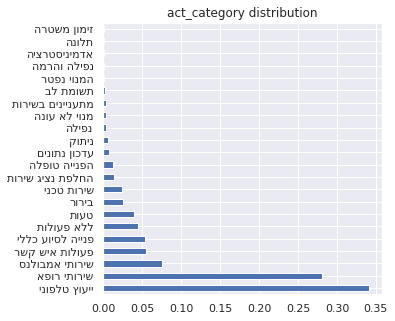

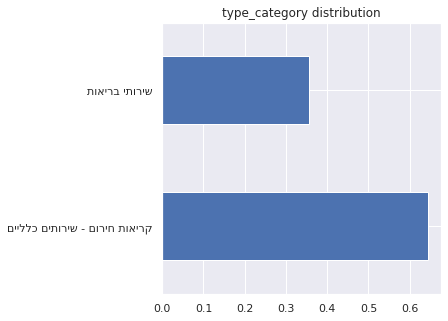

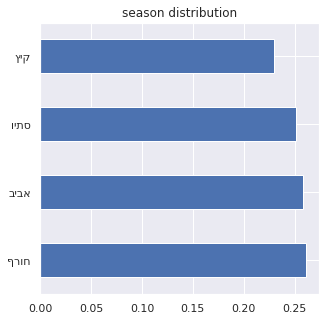

In [440]:
for i in columns_to_view:
    ax=plot_values_counts(df,i)

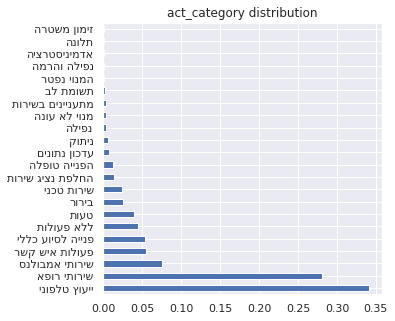

In [441]:
plot_values_counts(df,'act_category')

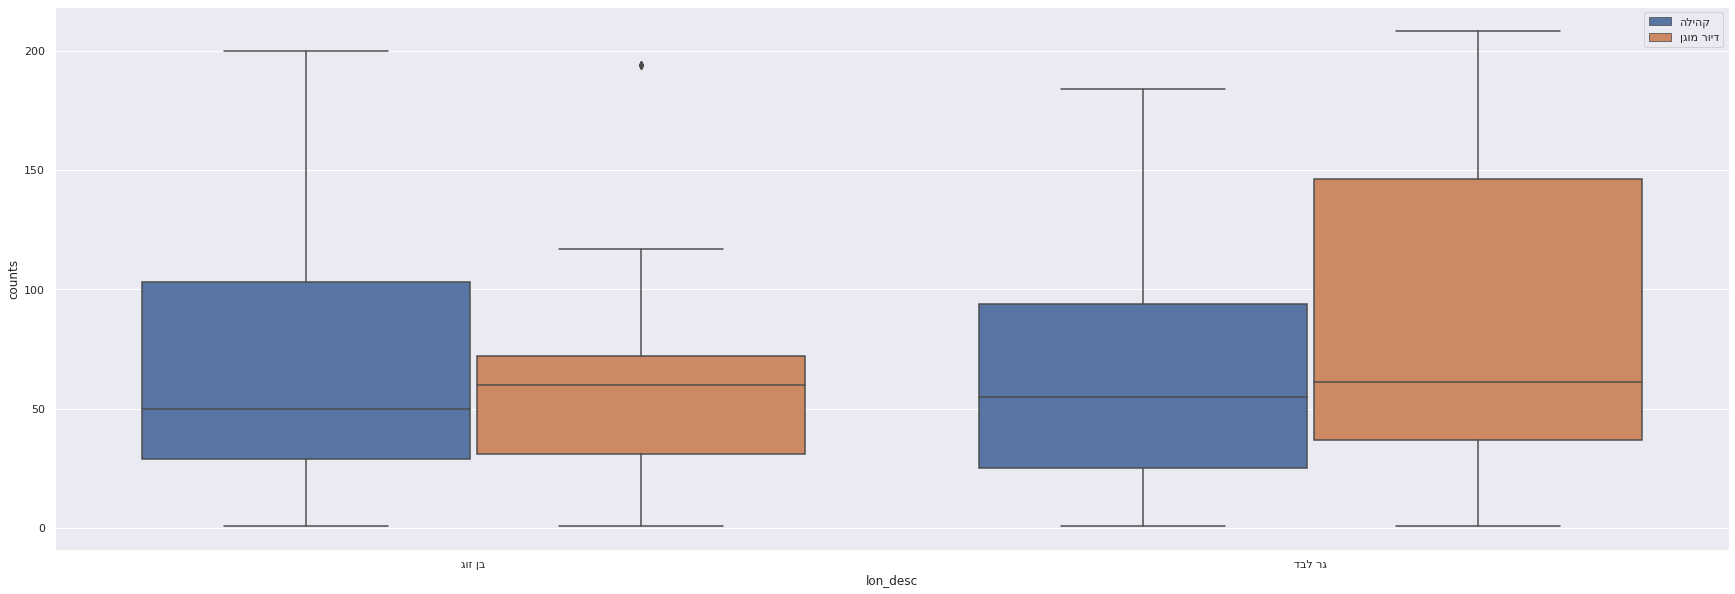

In [442]:
g=sns.boxplot(y = df['counts'], x = df['lon_desc'].apply(lambda x:reverse(x)),hue=df['residence_type'].apply(lambda x:reverse(x)))
plt.legend(loc='upper right')

In [443]:
# dfo=df[['lon_desc','residence_type','gender_name','act_category','action_desc']]
# for x in dfo.columns:
#     dfo[x]=dfo[x].apply(lambda x:reverse(x))
# dfo['counts']=df['counts']


# g = sns.catplot(x="residence_type", y="counts",col_wrap=8,
#                 hue="lon_desc", col="act_category",
#                 data=dfo, kind="violin",
#                 height=4, aspect=0.8)
# g.savefig("output.png")

In [444]:
df['t_call_int']=pd.to_datetime(df['t_call']).astype(np.int64)
#len(df.loc[(df['id']==3222)&(x['act_category']<50)])

<ipython-input-444-77e1cc1becc9>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['t_call_int']=pd.to_datetime(df['t_call']).astype(np.int64)


In [445]:
df['count_until_t_Call']=0
for index, row in df.iterrows():
    #if index>4:
    #    break
    id=row['id']
    date=row['t_call_int']
    val=len(df.loc[(df['id']==id)&(df['t_call_int']<date)])
    df.loc[index,'count_until_t_Call']=int(val)
   

In [7]:
df['act_category'].unique()

array(['שירותי רופא', 'ייעוץ טלפוני', 'שירות טכני', 'טעות', 'תשומת לב',
       'ניתוק', 'החלפת נציג שירות', 'שירותי אמבולנס', 'עדכון נתונים',
       'מנוי לא עונה', 'בירור', 'תלונה', 'ללא פעולות', 'נפילה',
       'פנייה לסיוע כללי', 'מתעניינים בשירות', 'פעולות איש קשר',
       'נפילה והרמה', 'זימון משטרה', 'הפנייה טופלה', 'המנוי נפטר',
       'אדמיניסטרציה'], dtype=object)

In [447]:
act_cat_lev=['ללא פעולות','טעות','ניסוי','חסר תיאור']
df_lev=df[df['act_category'].isin(act_cat_lev)]
df_lev_6h=df_lev[df_lev['quantile_10_count'].isin(['8','9','10'])]
df_lev_3l=df_lev[df_lev['quantile_10_count'].isin(['1','2','3'])]


In [448]:
df['counts'].describe()

count    22814.000000
mean        68.646708
std         51.118523
min          1.000000
25%         29.000000
50%         55.000000
75%         95.000000
max        208.000000
Name: counts, dtype: float64

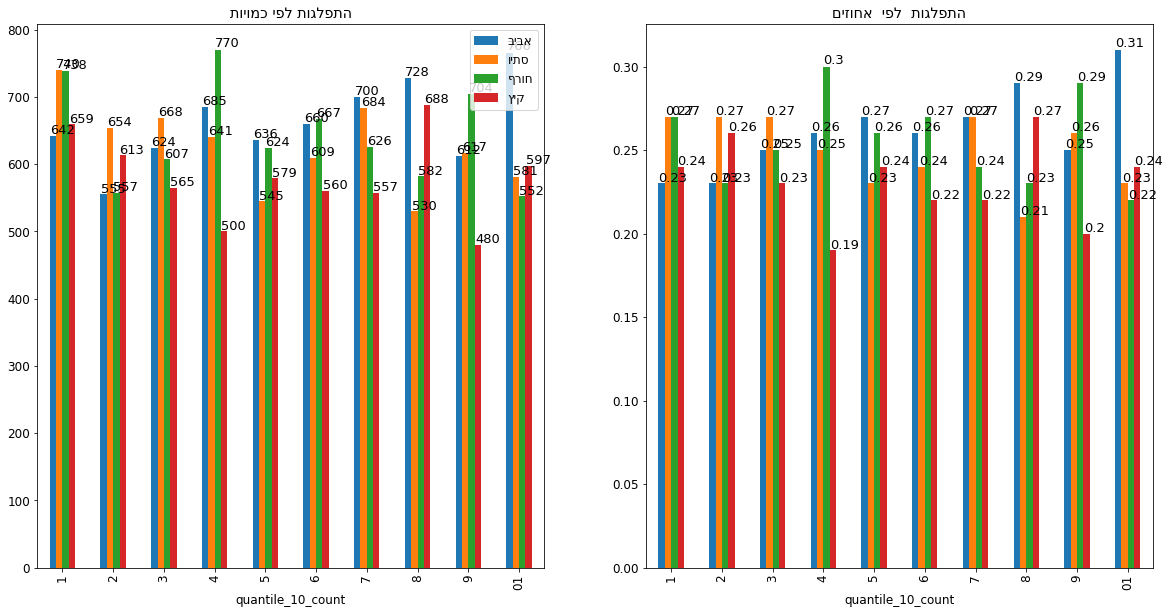

In [90]:
plots(df,'quantile_10_count','season')

In [449]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out', 't_call_int',
       'count_until_t_Call'],
      dtype='object')

In [552]:
df.to_excel("data_after_cleaned.xlsx",index=False)  

In [450]:
lof_col=['month', 'hour', 'year', 'gender_code', 'lon_code']
numeric_col=['month','year','gender_code','lon_code','']
categorial_col=['residence_type','sug_erua','day_type','day','action_desc','act_category','type_category','season']
x=df.copy()
for col in categorial_col:
    x[col] = x[col].astype('category').cat.codes

In [451]:
x=x.drop(['t_call','gender_name','lon_desc'], axis=1)

In [ ]:
x

In [ ]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [452]:
plots(coco,'quantile_10_count','gender_name')

NameError: name 'coco' is not defined

[Text(0.5, 1.0, 'רדגמ יפל תוינפה תומכ תוגלפתה')]

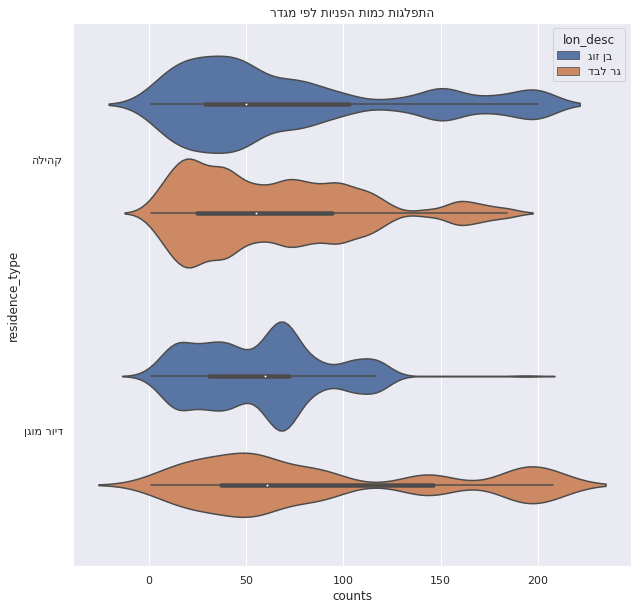

In [453]:
#sns.swarmplot(y = x['residence_type'], x = x['lon_code'])
sns.set(rc={"figure.figsize":(10, 10)})
sns.violinplot(y = df['residence_type'].apply(lambda x:reverse(x)), x = df['counts'],hue=df['lon_desc'].apply(lambda x:reverse(x))).set(title=reverse('התפלגות כמות הפניות לפי מגדר'))


[Text(0.5, 1.0, 'רדגמ יפל תוינפה תומכ תוגלפתה')]

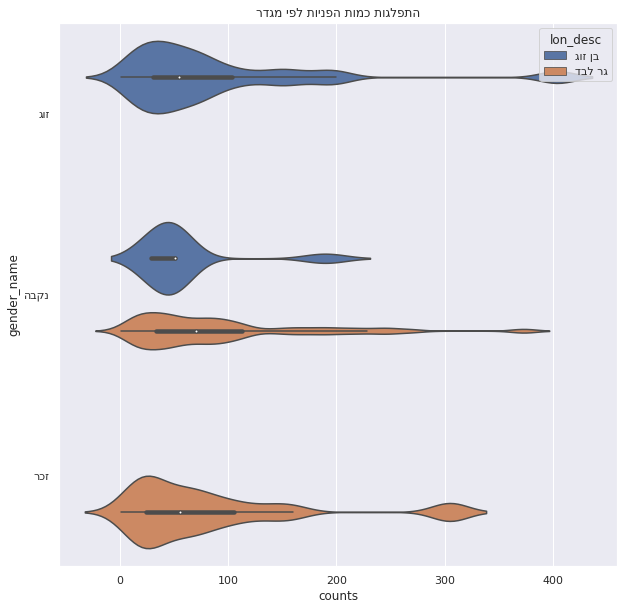

In [95]:
#sns.swarmplot(y = x['residence_type'], x = x['lon_code'])
sns.set(rc={"figure.figsize":(10, 10)})
sns.violinplot(y = df['gender_name'].apply(lambda x:reverse(x)), x = df['counts'],hue=df['lon_desc'].apply(lambda x:reverse(x))).set(title=reverse('התפלגות כמות הפניות לפי מגדר'))


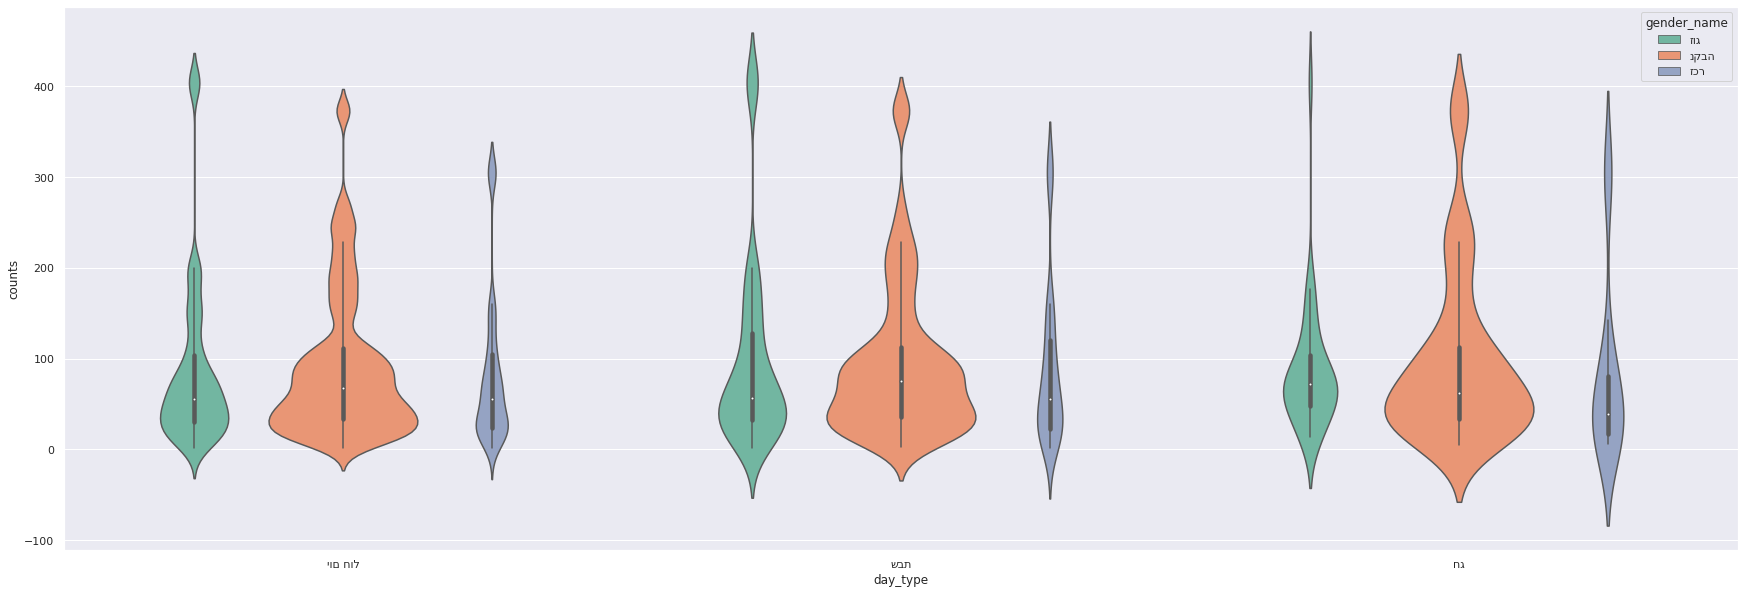

In [96]:
sns.set(rc={"figure.figsize":(30, 10)})
ax = sns.violinplot(x="day_type", y="counts", hue="gender_name",
                    data=df, palette="Set2",
                    scale="count")

In [97]:
# sns.set(rc={"figure.figsize":(10, 10)})
# df
# sns.FacetGrid(df, col = 'act_category', row = 'gender_name').map(sns.distplot, 'quantile_10_count').fig.suptitle("My super title", y=1.05)

In [98]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out', 't_call_int',
       'count_until_t_Call'],
      dtype='object')

In [8]:
df['action_desc'].value_counts()
df['action_desc'].unique()

array(['רופא - הוזמן', 'רופא - הגיע', 'רופא - בקשה',
       'ייעוץ טלפוני - הוזמן', 'ייעוץ טלפוני - בקשה',
       'ייעוץ טלפוני - בוצע', 'תקלה - מכשיר לא תקין', 'טעות',
       'בירור- רופא', 'תשומת לב', 'ניתוק - מנוי פרטי',
       'החלפה - נציג שירות', 'אמבולנס - הוזמן', 'אמבולנס - הגיע',
       'אמבולנס - בקשה', 'רופא - ביטול', 'עדכון  נתוני מנוי',
       'תקלה - מכשיר מרעיש', 'תקלה - בעיות בקו טלפון', 'מנוי לא עונה',
       'בירור- יעוץ טלפוני', 'תלונה', 'בירור- חברת רופאים',
       'בירור- החזר אמבולנס', 'בירור- אמבולנס', 'תקלה - שעון לא עובד',
       'ללא פעולות', 'נפילה', 'ניתוק - מנוי קבוצתי', 'פנייה לסיוע כללי',
       'תקלה - מכשיר קרא מעצמו', 'אב בית - בקשה', 'טכנאי - עזרה כללית',
       'אב בית - הוזמן', 'טכנאי - תיאום החלפה', 'תקלה - רצועה לשעון',
       'אמבולנס - ביטול', 'בירור - התקנה ', 'איחוד הצלה - עודכנו',
       'איש קשר - בקשה', 'איש קשר - עודכן', 'טכנאי - ביטול',
       'מתעניינים - שירות רפואי', 'מתעניינים - שירותי המוקד',
       'כונן הרמה - הוזמן', 'כונן הרמה - 

In [100]:
# for act in df['act_category'].unique():
#     print('***act***:',act)
#     print(df[df['act_category']==act]['quantile_10_count'].value_counts(dropna=False))
#     print('--------------------------------------')
# #df['act_category'].nunique()

<AxesSubplot:>

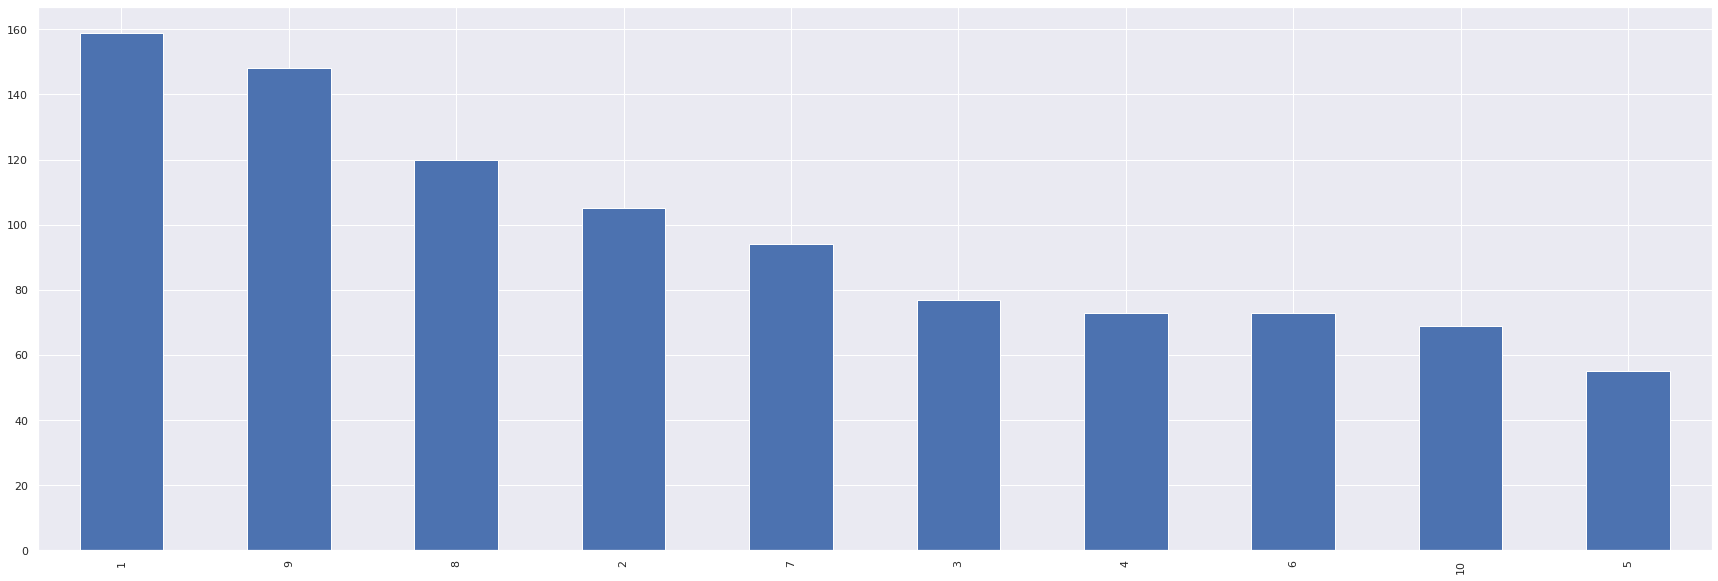

In [101]:
df[df['action_desc']=='טעות']['quantile_10_count'].value_counts().plot(kind='bar')

In [13]:
#df[(df['action_desc']=='תשומת לב עבור ריקים') & (df['counts']<5)]

df[df['lon_code']==1]['act_category'].value_counts()

#|df[df['id']==241799]


ייעוץ טלפוני        5400
שירותי רופא         4484
שירותי אמבולנס      1221
פנייה לסיוע כללי     924
פעולות איש קשר       862
ללא פעולות           776
טעות                 730
שירות טכני           428
בירור                404
החלפת נציג שירות     237
הפנייה טופלה         217
עדכון נתונים         127
ניתוק                110
מנוי לא עונה          68
מתעניינים בשירות      67
נפילה                 65
תשומת לב              41
נפילה והרמה           21
אדמיניסטרציה          21
המנוי נפטר            19
תלונה                 15
זימון משטרה           15
Name: act_category, dtype: int64

In [430]:
df[df['lon_code']==3].nunique()

#df

residence_type         1
sug_erua               3
t_call                68
month                 12
hour                  17
year                   6
day_type               2
day                    7
id                     2
gender_code            1
gender_name            1
lon_code               1
lon_desc               1
action_desc           19
act_category          10
type_category          2
season                 4
counts                 2
quantile_10_count      2
out_std                1
q_out                  1
t_call_int            68
count_until_t_Call    67
dtype: int64

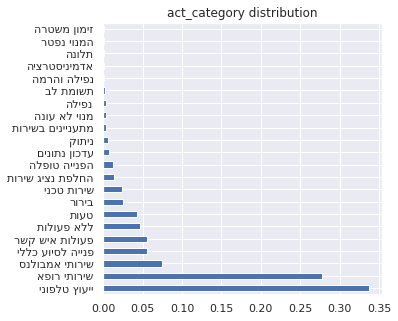

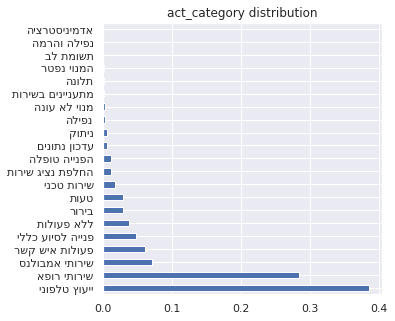

IndexError: index 0 is out of bounds for axis 0 with size 0

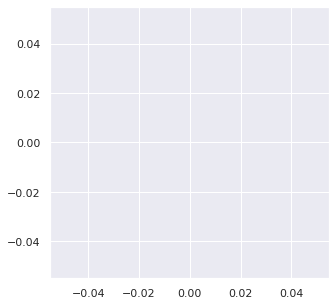

In [105]:
plot_values_counts(df[df['lon_code']==1],'act_category')
plot_values_counts(df[df['lon_code']==2],'act_category')
plot_values_counts(df[df['lon_code']==3],'act_category')
plot_values_counts(df[df['lon_code']==1],'counts')
plot_values_counts(df[df['lon_code']==2],'counts')
plot_values_counts(df[df['lon_code']==3],'counts')


SyntaxError: 'return' outside function (<ipython-input-14-e083b7042f6c>, line 5)

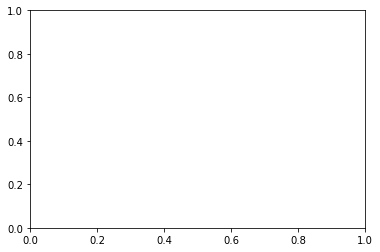

In [14]:
fig,ax=plt.subplots(1,1)
if df[col1].dtype=='int64':
    round(df[col1].value_counts(normalize=True),3).plot(kind='bar',ax=ax)
    plt.show()
    return
round(df[col1].apply(lambda x : reverse(x)).value_counts(normalize=True),3).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.001),size=13)
ax.title.set_text(f'{col1} distribution')
plt.show()

In [107]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out', 't_call_int',
       'count_until_t_Call'],
      dtype='object')

In [18]:
df[df['gender_name']=='זכר']

,residence_type,sug_erua,t_call,month,hour,year,day_type,day,id,gender_code,gender_name,lon_code,lon_desc,act_category,type_category,season
7,דיור מוגן,ECI לחצן,2012-01-01 17:52:26.927,1,17,2012,יום חול,ראשון,239867,4,זכר,1,גר לבד,ייעוץ טלפוני,קריאות חירום - שירותים כלליים,חורף
33,קהילה,ECI מכשיר,2012-01-05 12:17:48.773,1,12,2012,יום חול,חמישי,241845,4,זכר,1,גר לבד,ייעוץ טלפוני,קריאות חירום - שירותים כלליים,חורף
41,קהילה,ECI מכשיר,2012-01-05 20:07:05.187,1,20,2012,יום חול,חמישי,241845,4,זכר,1,גר לבד,שירותי רופא,שירותי בריאות,חורף
44,קהילה,ECI מכשיר,2012-01-05 20:08:41.107,1,20,2012,יום חול,חמישי,241845,4,זכר,1,גר לבד,שירותי רופא,שירותי בריאות,חורף
45,קהילה,ECI מכשיר,2012-01-05 20:09:47.853,1,20,2012,יום חול,חמישי,241845,4,זכר,1,גר לבד,שירותי רופא,שירותי בריאות,חורף
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22794,קהילה,ECI לחצן,2017-12-28 15:56:54.363,12,15,2017,יום חול,חמישי,242788,4,זכר,1,גר לבד,בירור,קריאות חירום - שירותים כלליים,חורף
22795,קהילה,ECI לחצן,2017-12-28 18:24:31.440,12,18,2017,יום חול,חמישי,242788,4,זכר,1,גר לבד,ייעוץ טלפוני,קריאות חירום - שירותים כלליים,חורף
22798,קהילה,ECI לחצן,2017-12-29 08:45:27.277,12,8,2017,יום חול,שישי,242788,4,זכר,1,גר לבד,פנייה לסיוע כללי,קריאות חירום - שירותים כלליים,חורף
22800,קהילה,ECI לחצן,2017-12-29 11:00:44.007,12,11,2017,יום חול,שישי,242788,4,זכר,1,גר לבד,בירור,קריאות חירום - שירותים כלליים,חורף


In [19]:
df.groupby(['gender_name'])['counts'].mean()#.unstack(level=1).plot(kind='bar',stacked=False,ax=ax[0],figsize=(20,10))

KeyError: 'Column not found: counts'

In [455]:
night=[19,20,21,22,23,0,1,2,3,4,5]
morning=[6,7,8,9,10,11,12]
noon=[13,14,15,16,17,18]





In [20]:
# df['day_time']=0
# df.loc[df['hour'].isin(night),'day_time']='ערב'
# df.loc[df['hour'].isin(morning),'day_time']='בוקר'
# df.loc[df['hour'].isin(noon),'day_time']='צהרים'

In [113]:
# g = sns.FacetGrid(df, col="gender_name",  row="lon_desc")
# # g.map_dataframe(sns.barplot, x=round(df['act_category'].apply(lambda x : reverse(x)).value_counts(normalize=True),3))

In [12]:
#df[["gender_name", "act_category"]].apply(lambda x:reverse(x)).plot(kind="bar")

#g = sns.FacetGrid(df, col="Team")
#g.map_dataframe(plot_area)




dfo=df[['lon_desc','residence_type','gender_name','act_category','id']]
for x in dfo.columns:
    if x=='id':
        continue
    dfo[x]=dfo[x].apply(lambda x:reverse(x))
x=pd.DataFrame({'size':dfo.groupby(['gender_name','lon_desc']).size()}).reset_index()

/home/yaron/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
dfo

,lon_desc,residence_type,gender_name,act_category,id
0,גוז ןב,הליהק,גוז,אפור יתוריש,241436
3,דבל רג,הליהק,הבקנ,ינופלט ץועיי,241107
6,דבל רג,הליהק,הבקנ,ינכט תוריש,242663
7,דבל רג,ןגומ רויד,רכז,ינופלט ץועיי,239867
10,גוז ןב,ןגומ רויד,גוז,אפור יתוריש,231619
...,...,...,...,...,...
22803,גוז ןב,הליהק,גוז,אפור יתוריש,7859
22806,דבל רג,הליהק,הבקנ,יללכ עויסל היינפ,236424
22807,גוז ןב,הליהק,גוז,ינופלט ץועיי,9860
22810,גוז ןב,הליהק,גוז,רשק שיא תולועפ,9860


In [14]:
df.groupby('id').first()[['gender_name','lon_desc']].value_counts(normalize=False)

gender_name  lon_desc
נקבה         גר לבד      442
זוג          בן זוג      227
זכר          גר לבד      104
נקבה         בן זוג        2
dtype: int64

NameError: name 'col2' is not defined

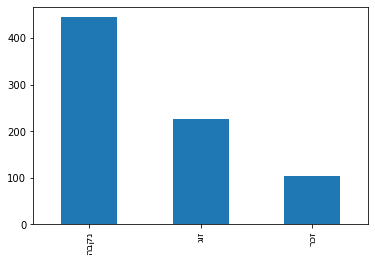

In [24]:
#plot_values_counts(df.groupby('id').first()['gender_name'].value_counts(normalize=True),'gender_name')
sns.color_palette("Set2")
df.groupby('id').first()['gender_name'].apply(lambda x:reverse(x)).value_counts(normalize=False).plot(kind='bar',stacked=True)
round(df.groupby('gender_name').size()/df.groupby('id').first()['gender_name'].value_counts(normalize=False),3)
df.groupby('gender_name').size()


round(dfo.groupby(col2).size()/dfo.groupby(col1).first()[col2].value_counts(normalize=False),3).plot(kind='bar',ax=ax)

gender_name  lon_desc
הבקנ         דבל רג      17.124
גוז          גוז ןב      15.493
רכז          דבל רג      16.375
הבקנ         גוז ןב      22.500
dtype: float64

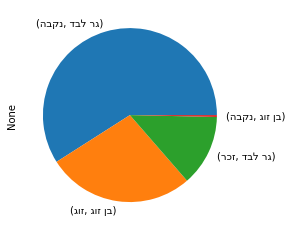

In [25]:
#print(dfo.groupby(['gender_name','lon_desc']).size())#.value_counts(normalize=False))
dfo[['gender_name','lon_desc']].value_counts(normalize=False).plot(kind='pie')

sns.color_palette("Set2")
round(dfo[['gender_name','lon_desc']].value_counts(normalize=False)/dfo.groupby('id').first()[['gender_name','lon_desc']].value_counts(normalize=False),3)

TypeError: unsupported operand type(s) for /: 'int' and 'AxesSubplot'

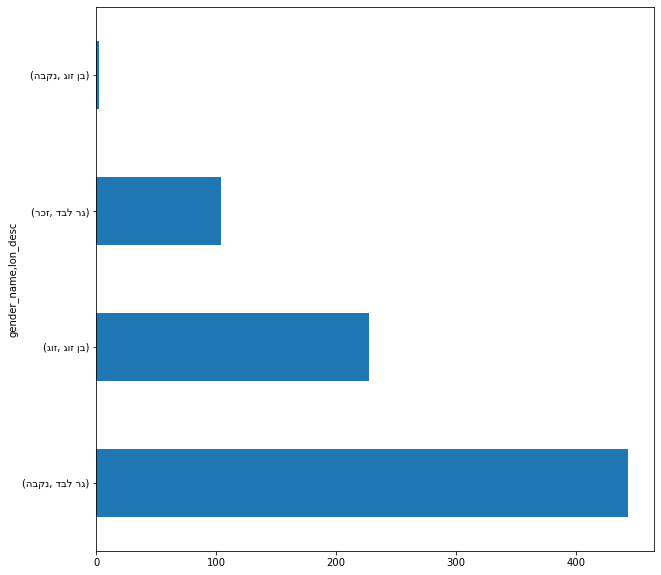

In [26]:
fig,ax=plt.subplots(1,1)
dfo.groupby(['gender_name','lon_desc']).size()/dfo.groupby('id').first()[['gender_name','lon_desc']].value_counts(normalize=False).plot(kind='barh',figsize=(10, 10),ax=ax)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(2, 0), textcoords='offset points', ha="left", va="center",size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(reverse('התפלגות הרשומות לפי מגדר ורמת בדידות'),fontdict={'fontsize': 20, 'fontweight': 'medium','color':'black'})


gender_name  act_category    
גוז          אפור יתוריש          12.108
             בל תמושת                NaN
             היצרטסינימדא            NaN
             הליפנ                19.000
             הלפוט היינפה         10.571
                                  ...   
רכז          רשק שיא תולועפ      141.000
             תולועפ אלל           14.182
             תועט                  9.154
             תוריש גיצנ תפלחה     15.667
             תורישב םיניינעתמ        NaN
Length: 64, dtype: float64

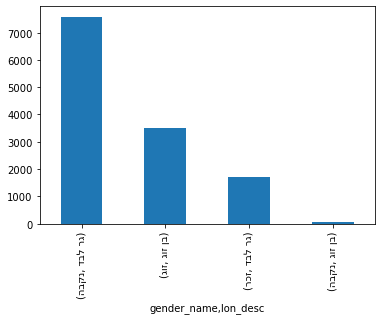

In [27]:
#print(dfo.groupby(['gender_name','lon_desc']).size())#.value_counts(normalize=False))
dfo[['gender_name','lon_desc']].value_counts(normalize=False).plot(kind='bar')

sns.color_palette("Set2")
round(dfo[['gender_name','act_category']].value_counts(normalize=False)/dfo.groupby('id').first()[['gender_name','act_category']].value_counts(normalize=False),3)

In [ ]:
df.groupby(['act_category']).size())

Text(0.5, 1.0, 'גוז ינב רובע תוינפ יאשונ תוגלפתה')

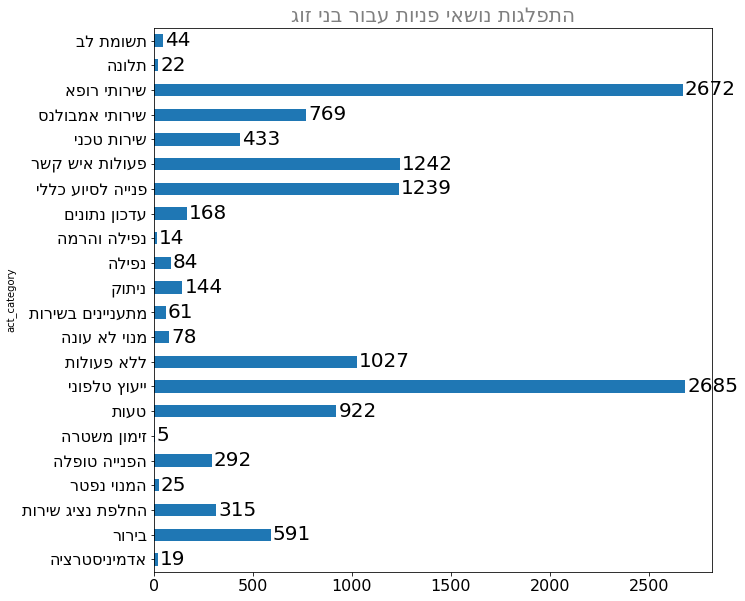

In [28]:
fig,ax=plt.subplots(1,1)
#dfi=df.loc[(df['gender_name']=='זוג')]
(df.groupby(['act_category']).size()).plot(kind='barh',figsize=(10, 10),ax=ax)

labels = [reverse(item.get_text()) for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(2, 0), textcoords='offset points', ha="left", va="center",size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(reverse('התפלגות נושאי פניות עבור בני זוג'),fontdict={'fontsize': 20, 'fontweight': 'medium','color':'gray'})
# g = sns.FacetGrid(x, col="gender_name",height=10, aspect=0.77)
# g.map_dataframe(sns.barplot, "size", "act_category")
# for ax in g.axes.ravel():
#     for p in ax.patches:
#         ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#                 xytext=(2, 0), textcoords='offset points', ha="left", va="center")

In [ ]:
sns.catplot(y="act_category", hue="gender_name", kind="count",
            palette="pastel", edgecolor=".6",
            data=x)

In [15]:
y=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False)
dic={}
for i in zip(y.index,y.values):
    dic[i[0][0]]=i[1]
dic

{'הבקנ': 444, 'גוז': 227, 'רכז': 104}

In [16]:
x=dfo[['act_category','gender_name']].value_counts().unstack()
x.columns
for col in x.columns:
    x[col]=x[col]/dic[col]

In [17]:
x=x.sort_values(by=['הבקנ', 'גוז','רכז'],)

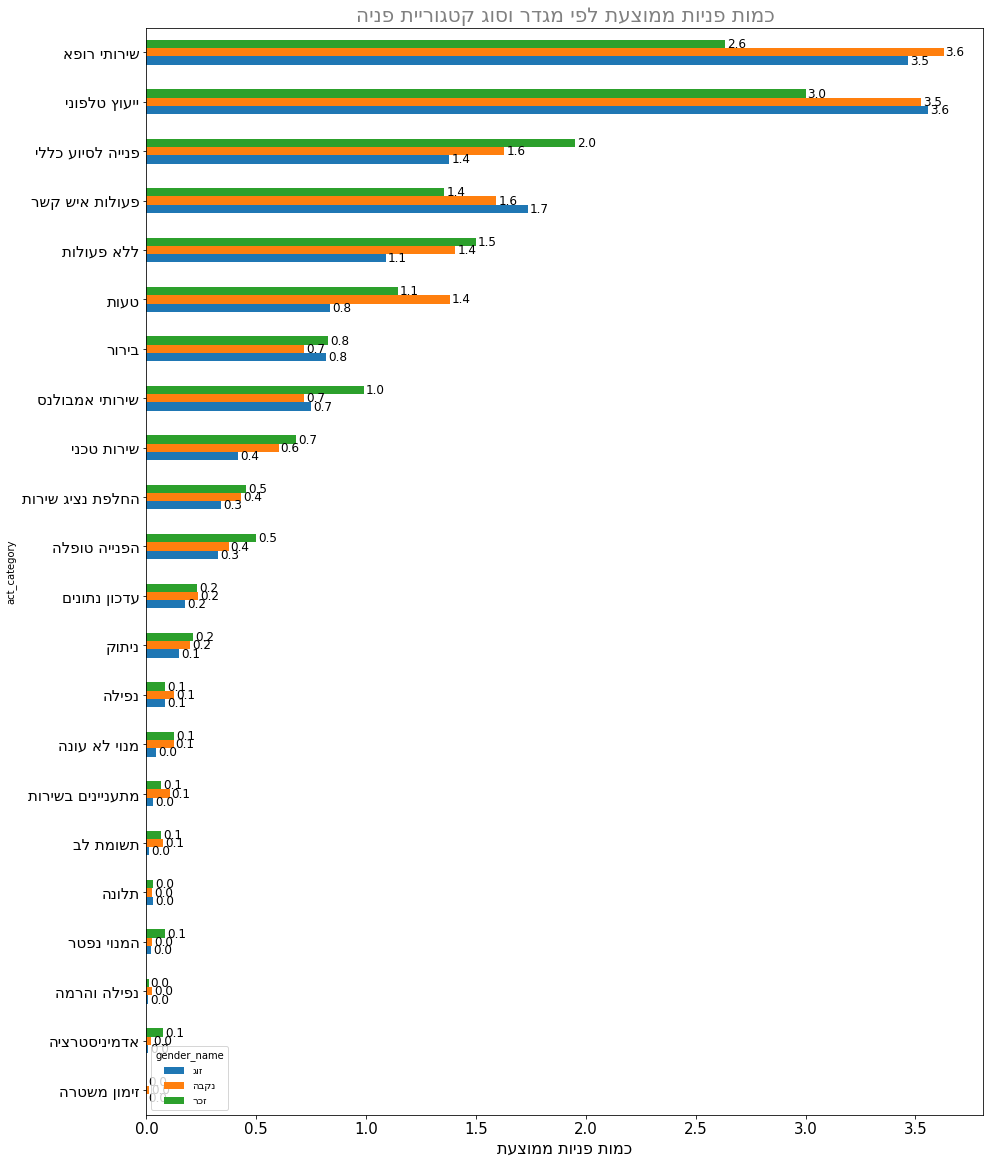

In [18]:
fig,ax=plt.subplots(1,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title(reverse('כמות פניות ממוצעת לפי מגדר וסוג קטגוריית פניה'),fontdict={'fontsize': 20, 'fontweight': 'medium','color':'gray'})
ax.set_xlabel(reverse('כמות פניות ממוצעת'), fontsize=16)
x.plot(kind='barh',figsize=(15, 20),ax=ax)

for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(2, 0), textcoords='offset points', ha="left", va="center",size=12)
#plt.savefig('foo.png')

In [39]:
print(df.columns)
df['gender_code']=df['gender_code'].astype(int)              

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'act_category', 'type_category', 'season'],
      dtype='object')


In [42]:
amb=df[df['act_category']=='שירותי אמבולנס']

In [50]:
amb.groupby(['id'],as_index=False).size()


amb[amb['id']==1308].sort_values(by='t_call')


,residence_type,sug_erua,t_call,month,hour,year,day_type,day,id,gender_code,gender_name,lon_code,lon_desc,act_category,type_category,season
20492,דיור מוגן,ECI לחצן,2017-05-23 23:33:13.327,5,23,2017,יום חול,שלישי,1308,5,נקבה,1,גר לבד,שירותי אמבולנס,שירותי בריאות,אביב
20607,דיור מוגן,ECI לחצן,2017-06-01 18:41:39.320,6,18,2017,יום חול,חמישי,1308,5,נקבה,1,גר לבד,שירותי אמבולנס,שירותי בריאות,קיץ


In [52]:
df['act_category'].value_counts()


ייעוץ טלפוני        2685
שירותי רופא         2672
פעולות איש קשר      1242
פנייה לסיוע כללי    1239
ללא פעולות          1027
טעות                 922
שירותי אמבולנס       592
בירור                591
שירות טכני           433
החלפת נציג שירות     315
הפנייה טופלה         292
עדכון נתונים         168
ניתוק                144
נפילה                 84
מנוי לא עונה          78
מתעניינים בשירות      61
תשומת לב              44
המנוי נפטר            25
תלונה                 22
אדמיניסטרציה          19
נפילה והרמה           14
זימון משטרה            5
Name: act_category, dtype: int64

In [36]:
dfo=df.copy()
col_to_reverse=['residence_type','sug_erua','day_type','gender_name','lon_desc','act_category','type_category','season','day']
for col in col_to_reverse:
    dfo[col]=dfo[col].apply(lambda x:reverse(x))


In [37]:
dfo.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'act_category', 'type_category', 'season'],
      dtype='object')

TypeError: no numeric data to plot

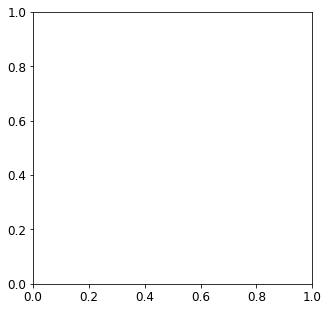

In [38]:
# fig,ax=plt.subplots(1,1,figsize=(6, 6))
# dfo.groupby('id').first()[['gender_name','lon_desc']].value_counts(normalize=False).unstack(level=1).plot(kind='bar',ax=ax)
# ax.title.set_text(reverse('כמות אזרחים לפי סוג רמת "בדידות"'))
# #ax.title.set_text(reverse(f'{title} - אחוזים'))
# ax.set_ylabel(reverse('כמות אזרחים ותיקים'), fontsize=16)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
# plt.show()

fig,ax=plt.subplots(1,1,figsize=(5, 5))
round(dfo[dfo['gender_name']=='נקבה'].groupby(['lon_desc','gender_name']).size()/dfo[dfo['gender_name']=='נקבה'].groupby('id').first()[['lon_desc','gender_name']].value_counts(normalize=False),3).unstack(level=0).plot(kind='bar',ax=ax)
ax.title.set_text(reverse('כמות פניות ממוצעת לפי מגדר וסוג ורמת "בדידות"'))
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
plt.show()

KeyError: "['day_type'] not in index"

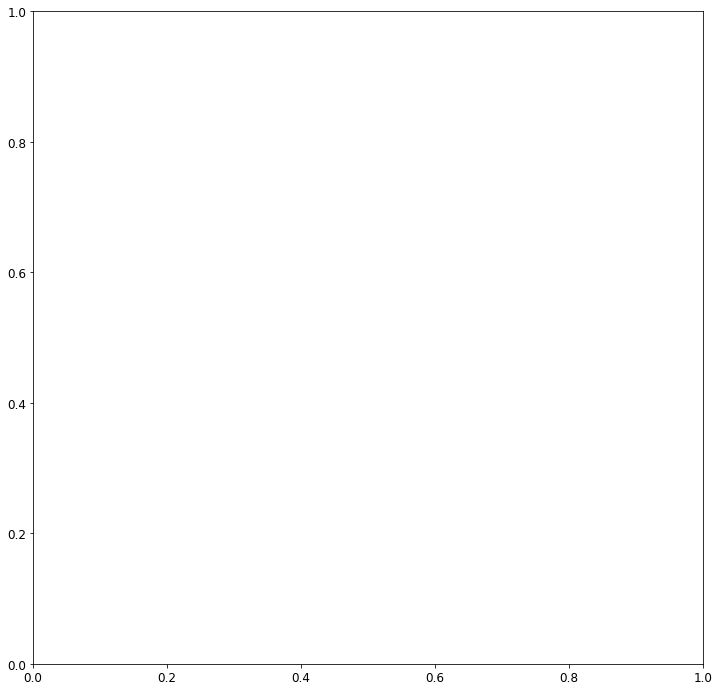

In [31]:
fig,ax=plt.subplots(1,1,figsize=(12, 12))
y=dfo[['day_type','gender_name']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('gender_name'), on='gender_name')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר וסוג יום'))
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()


#----------
fig,ax=plt.subplots(1,1,figsize=(12, 12))
y=dfo[['day_type','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת בדידות וסוג יום'))
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()
#---------------




fig,ax=plt.subplots(1,1,figsize=(12, 12))
y=dfo[['day_type','residence_type']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['residence_type']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('residence_type'), on='residence_type')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר וסוג יום'))
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()




fig,ax=plt.subplots(1,1,figsize=(12, 12))
y=dfo[['day_type','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת בדידות'))
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()



#------
fig,ax=plt.subplots(1,1,figsize=(20, 20))
y=dfo[['season','gender_name']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('gender_name'), on='gender_name')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר ועונה'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()

#------
fig,ax=plt.subplots(1,1,figsize=(10, 5))
y=dfo[['season','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת "בדידות" ועונה'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()

#------
fig,ax=plt.subplots(1,1,figsize=(25, 5))
y=dfo[['day','gender_name']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('gender_name'), on='gender_name')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר ויום בשבוע'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()
#------
fig,ax=plt.subplots(1,1,figsize=(25, 5))
y=dfo[['day','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת בדידות ויום בשבוע'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()
#------
fig,ax=plt.subplots(1,1,figsize=(8, 5))
y=dfo[['sug_erua','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת בדידות וסוג אירוע'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()
#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['sug_erua','gender_name']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('gender_name'), on='gender_name')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר וסוג אירוע'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()

#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['day_time','gender_name']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['gender_name']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('gender_name'), on='gender_name')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי מגדר וזמן ביום'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()


#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['day_time','lon_desc']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['lon_desc']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('lon_desc'), on='lon_desc')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי רמת בדידות וזמן ביום'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()



#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['day_time','residence_type']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['residence_type']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('residence_type'), on='residence_type')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי סוג הדיור וזמן ביום'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()


#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['season','residence_type']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['residence_type']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('residence_type'), on='residence_type')
for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)
z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי סוג הדיור והעונה'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()



#------
fig,ax=plt.subplots(1,1,figsize=(13, 5))
y=dfo[['day','residence_type']].value_counts().unstack(level=0)#.plot(kind='bar')
#for i in cols:
#     z[i]=round(z[i]/z['val'],3)
# z.plot(kind='bar',x=z['gender_name'],y=z[cols])
x=dfo.groupby('id').first()[['residence_type']].value_counts(normalize=False).to_frame(name='vals').reset_index()
z=y.join(x.set_index('residence_type'), on='residence_type')

for i in y.columns:
    z[i]=round(z[i]/z['vals'],2)
z = z.drop(['vals'], axis=1)

z.plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
ax.title.set_text(reverse('כמות ממוצעת של פניות לפי סוג הדיור והיום בשבוע'))
plt.xticks(fontsize=16)
ax.set_ylabel(reverse('כמות פניות ממוצעת'), fontsize=16)
plt.show()

,חג,יום חול,שבת,vals
gender_name,,,,
זוג,0.423,24.762,3.330,227
זכר,0.462,24.356,2.625,104
נקבה,0.510,26.169,3.629,445


gender_name
זוג      6473
זכר      2854
נקבה    13487
dtype: int64

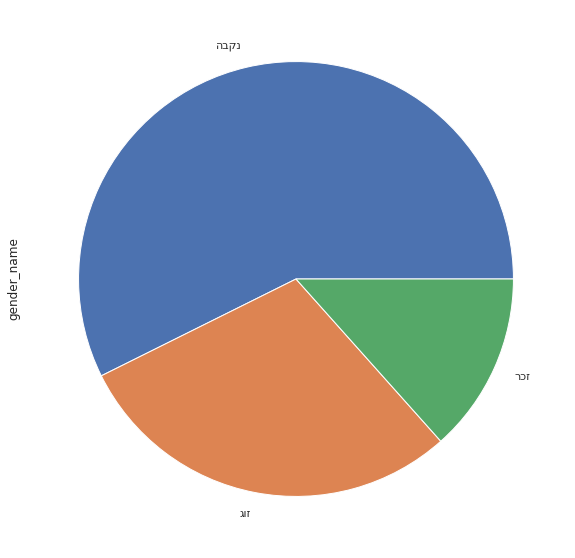

In [307]:
#plot_values_counts(df.groupby('id').first()['gender_name'].value_counts(normalize=True),'gender_name')
sns.color_palette("Set2")
df.groupby('id').first()['gender_name'].apply(lambda x:reverse(x)).value_counts(normalize=False).plot(kind='pie',stacked=True)
round(df.groupby('gender_name').size()/df.groupby('id').first()['gender_name'].value_counts(normalize=False),3)
df.groupby('gender_name').size()

In [29]:
def rel_plots(df,col1,col2,title):
    fig,ax=plt.subplots(1,2,figsize=(10, 5))
    plt.rcParams.update({'font.size':12})
    df.groupby(col1).first()[col2].apply(lambda x:reverse(x)).value_counts(normalize=False).plot(kind='bar',ax=ax[0])
    for p in ax[0].patches:
        ax[0].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    #ax[0].legend(prop={'size':12},loc=1)
    ax[0].title.set_text(reverse(f'{title} - כמויות'))
    ax[1].title.set_text(reverse(f'{title} - אחוזים'))
    ax[0].set_ylabel(reverse('כמות אזרחים ותיקים'), fontsize=16)
    ax[1].set_ylabel(reverse('אחוז אזרחים ותיקים'), fontsize=16)
    #round(df.groupby(col2).size()/df.groupby(col1).first()[col2].value_counts(normalize=False),3).plot(kind='bar',ax=ax[1])
    round(df.groupby(col1).first()[col2].apply(lambda x:reverse(x)).value_counts(normalize=True),3).plot(kind='bar',ax=ax[1])
    for p in ax[1].patches:
        ax[1].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    plt.show()


In [27]:
def mean_plot(df,col1,col2,title):
    dfo=df.copy()
    dfo[col2]=df[col2].apply(lambda x:reverse(x))
    fig,ax=plt.subplots(1,1,figsize=(10, 5))
    plt.rcParams.update({'font.size':12})
    round(dfo.groupby(col2).size()/dfo.groupby(col1).first()[col2].value_counts(normalize=False),3).plot(kind='bar',ax=ax)
    for p in ax.patches:
        ax.annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    #ax[0].legend(prop={'size':12},loc=1)
    ax.title.set_text(reverse(f'{title} - כמויות'))
    #ax.title.set_text(reverse(f'{title} - אחוזים'))
    ax.set_ylabel(reverse('כמות פניות'), fontsize=16)
    #ax[1].set_ylabel(reverse('אחוז אזרחים ותיקים'), fontsize=16)
    #round(df.groupby(col2).size()/df.groupby(col1).first()[col2].value_counts(normalize=False),3).plot(kind='bar',ax=ax[1])
#     round(df.groupby(col1).first()[col2].apply(lambda x:reverse(x)).value_counts(normalize=True),3).plot(kind='bar',ax=ax[1])
#     for p in ax[1].patches:
#         ax[1].annotate(str(p.get_height()),(p.get_x()*1.001,p.get_height()*1.005),size=13)
    plt.show()


In [478]:
df.columns

Index(['residence_type', 'sug_erua', 't_call', 'month', 'hour', 'year',
       'day_type', 'day', 'id', 'gender_code', 'gender_name', 'lon_code',
       'lon_desc', 'action_desc', 'act_category', 'type_category', 'season',
       'counts', 'quantile_10_count', 'out_std', 'q_out', 't_call_int',
       'count_until_t_Call'],
      dtype='object')

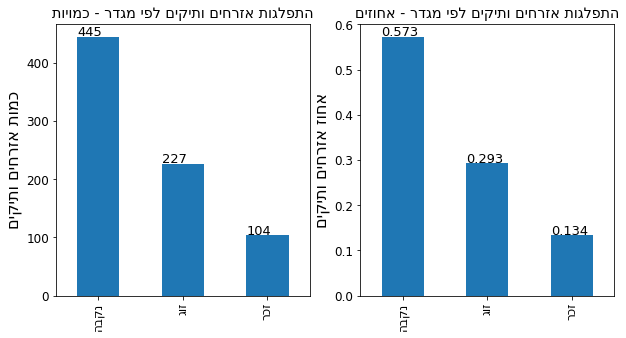

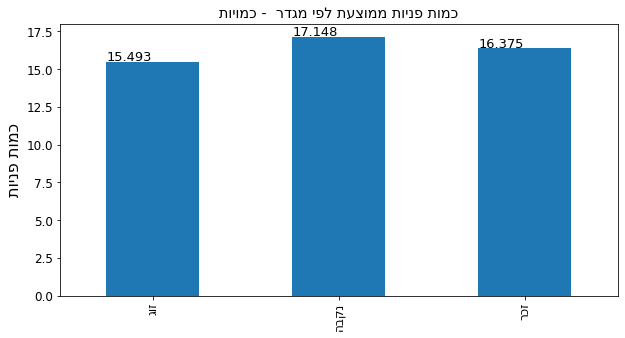

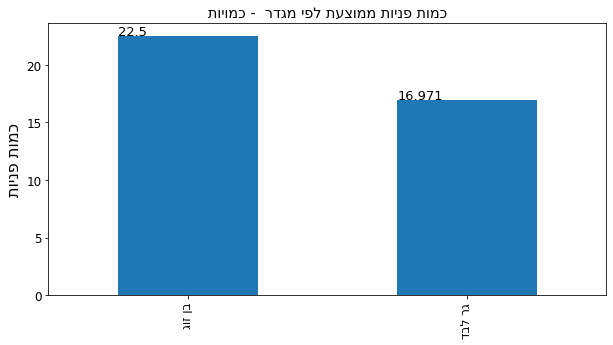

In [30]:
rel_plots(df,'id','gender_name','התפלגות אזרחים ותיקים לפי מגדר')
mean_plot(df,'id','gender_name','כמות פניות ממוצעת לפי מגדר ')
mean_plot(df[df['gender_name']=='נקבה'],'id','lon_desc','כמות פניות ממוצעת לפי מגדר ')

In [340]:
num_women=list(df[df['gender_name']=='נקבה']['id'].unique())
num_men=list(df[df['gender_name']=='זכר']['id'].unique())
zug=list(df[df['gender_name']=='זוג']['id'].unique())

In [ ]:
גרף פתיחה של פילוח גברים נשים זוג
גרפים יחסיים